<a href="https://colab.research.google.com/github/seanvw/Ann_Egs/blob/main/linear_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [155]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt


# Number of samples
num_samples = 100
epochs = 100
model_type = "2 Layer ANN"
model_type = "3 Layer ANN"

# Generate random values for feature1 and feature2
np.random.seed(0)  # For reproducibility
feature1 = np.random.rand(num_samples)
feature2 = np.random.rand(num_samples)
feature3 = np.random.rand(num_samples)

# Calculate y using the linear model
c0 = 10
c1 = 1.2
c2 = 2.4
c3 = 3.9
label = c0 + (c1 * feature1) + (c2 * feature2) + (c3 * feature3)
SUB = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")

model_as_text = "y = " + str(c0) + " + " + str(c1) + " X1 + ".translate(SUB) + str(c2) + " X2 + ".translate(SUB) + str(c3) + " X3".translate(SUB)



# Create a DataFrame to hold the data
data = pd.DataFrame({
    'feature1': feature1,
    'feature2': feature2,
    'feature3': feature3,
    'label': label
})

# print(data)

# Column to sort by (e.g., the second column, index 1)
column_index = 3

print("\nSorted\n")

# Sort the array based on the specified column
data = data.sort_values(by='label')

print(data)


Sorted

    feature1  feature2  feature3      label
4   0.423655  0.248753  0.024679  11.201640
83  0.692472  0.237893  0.013237  11.453533
33  0.568434  0.298282  0.025663  11.498083
59  0.244426  0.069167  0.292148  11.598687
61  0.110375  0.453543  0.100294  11.612099
..       ...       ...       ...        ...
19  0.870012  0.692532  0.831048  15.947179
40  0.359508  0.896547  0.863856  15.952158
70  0.976459  0.521037  0.977495  16.234470
9   0.383442  0.952749  0.896671  16.243745
51  0.438602  0.868126  0.940432  16.277509

[100 rows x 4 columns]


In [160]:
# Define the features and the target variable
X = data[['feature1', 'feature2', 'feature3']].values
y = data['label'].values

print(X[1:10])

print("X.shape[1]")
print(X.shape[1])

print(y[1:10])

[[0.69247212 0.23789282 0.01323686]
 [0.56843395 0.29828233 0.02566272]
 [0.24442559 0.069167   0.29214753]
 [0.11037514 0.45354268 0.10029394]
 [0.58651293 0.22741463 0.09784448]
 [0.66741038 0.20984375 0.13690027]
 [0.43703195 0.36756187 0.11753186]
 [0.11827443 0.42385505 0.18563594]
 [0.31798318 0.16469416 0.29302028]]
X.shape[1]
3
[11.45353306 11.49808292 11.59868685 11.61209898 11.63120412 11.83842851
 11.86496107 11.88316161 11.9196249 ]


In [157]:


if (model_type == "2 Layer ANN"):
  model_desc = "2 layer ANN, samples(" + str(num_samples) + "), epochs(" + str(epochs) + ")"
  # Create and compile the model
  model = tf.keras.Sequential([
      tf.keras.layers.Dense(1, input_shape=(X.shape[1],))
  ])
  model.compile(optimizer='adam', loss='mean_squared_error')
else:
  model_desc = "3 layer ANN, samples(" + str(num_samples) + "), epochs(" + str(epochs) + ")"
  model = Sequential()
  model.add(Dense(20, input_dim=X.shape[1], kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(1))
  model.compile(loss='mae', optimizer='adam')

# Train the model
model.fit(X, y, epochs=epochs, verbose=1)



Epoch 1/100
4/4 [==============================] - 1s 4ms/step - loss: 13.0224
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 12.9777
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 12.9329
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 12.8883
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 12.8436
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 12.7993
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 12.7542
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 12.7091
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 12.6629
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 12.6163
Epoch 11/100
4/4 [==============================] - 0s 5ms/step - loss: 12.5696
Epoch 12/100
4/4 [==============================] - 0s 4ms/step - loss: 12.5215
Epoch 13/100
4/4 [==============================]

In [158]:

# Make predictions
predictions = model.predict(X)

if (True):
  print("labels")
  # is also y
  # print(data['label'].values)
  print(y[1:20])
  print("predictions")
  pred = predictions[:,0]
  print(pred[1:20])



4/4 [==============================] - 0s 5ms/step
labels
[11.45353306 11.49808292 11.59868685 11.61209898 11.63120412 11.83842851
 11.86496107 11.88316161 11.9196249  12.11205309 12.11889694 12.19959684
 12.27176719 12.36973504 12.4201241  12.42117694 12.42980173 12.55413867
 12.5846045 ]
predictions
[ 8.419164   8.5318575  7.8245535  8.70346    8.557954   8.8774805
  9.121722   9.023359   8.58676    8.879812  10.292634   9.761474
  9.80187   10.322451  10.618248   9.137223   9.488729  11.08135
 11.402278 ]


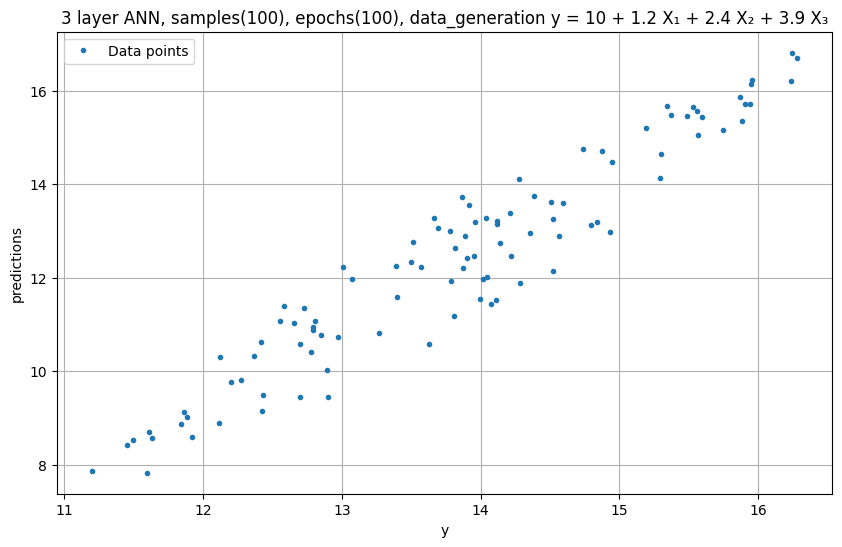

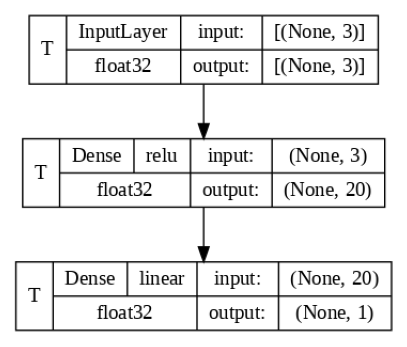

In [159]:
# Plotting the vectors
plt.figure(figsize=(10, 6))
plt.plot(y, pred, '.', label='Data points')

# Adding titles and labels
plt.title(model_desc + ", data_generation " + model_as_text)
plt.xlabel('y')
plt.ylabel('predictions')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

# Generate a plot of the model
plot_model(model, to_file='model.png',
           show_shapes=True,
           show_layer_names=False,
           show_dtype=True,
           #rankdir='TB',
           expand_nested=True,
           dpi=100,
           show_layer_activations=True,
           show_trainable=True
           )


# Display the plot
plt.figure(figsize=(5, 5))
img = plt.imread('model.png')
plt.axis('off')
plt.imshow(img)
plt.show()

